<a href="https://colab.research.google.com/github/7330717512/News_category_classifier_model/blob/main/News_Classifier_W2V_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/news-data.csv')

In [ ]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
data = data.drop_duplicates()

In [ ]:
data = data.reset_index()

In [ ]:
data.drop('index',inplace=True,axis=1)

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
data.sample(5)

,category,text
778,tech,virus poses as christmas e-mail security firms...
399,tech,progress on new internet domains by early 2005...
1475,business,fed chief warning on us deficit federal reserv...
195,entertainment,versace art portfolio up for sale the art coll...
2078,sport,palace threat over cantona masks manchester un...


In [ ]:
corpus = []
for i in range(0, len(data)):
  text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
  text = text.lower()
  text = ' '.join((word) for word in text.split() if word not in stopwords.words('english'))
  corpus.append(text)

In [ ]:
type(corpus)

list

In [ ]:
import gensim

In [ ]:
X = [text.split() for text in corpus]

In [ ]:
print(X[0])

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talked', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'als

In [ ]:
word_dim = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=word_dim, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

27757

In [ ]:
w2v_model.wv['tv']

array([ 0.67662275, -1.0334438 , -1.2498723 ,  0.4642259 , -0.31823134,
        0.9096595 ,  0.6405862 ,  0.02017526,  0.46156716,  0.4930793 ,
        1.204403  , -1.1971449 , -0.6796143 ,  1.4479973 ,  1.6374243 ,
       -1.4468589 , -0.6026423 ,  0.81836516, -0.6939856 , -0.39179695,
        0.8256182 , -0.28909612, -0.3669232 ,  0.01656687, -0.16160132,
        0.68780845,  2.1231458 ,  0.734782  , -1.4832156 , -0.02544208,
        0.8019432 , -0.26191905,  0.41494957, -0.7801892 ,  1.0867957 ,
       -0.28089076, -0.3203305 ,  2.237911  , -0.7455646 ,  0.3096855 ,
        0.49603358,  1.5252997 ,  0.5052769 ,  0.2480773 ,  0.3260491 ,
        0.40494174,  1.8208326 ,  0.97670597, -0.4740476 ,  0.29046497,
       -0.35490853,  0.25327888,  0.23319468, -1.101716  ,  0.49833256,
       -0.7253098 , -0.70313704,  1.1808445 ,  1.7187347 , -0.30352384,
        0.02588947,  0.1269267 , -1.1466702 ,  0.6287944 , -1.1429576 ,
       -0.05408631, -0.76962334, -1.214287  ,  0.6539099 , -0.73

In [ ]:
w2v_model.wv.most_similar('tvs')

[('hd', 0.9992241859436035),
 ('boxes', 0.998249888420105),
 ('popular', 0.9976439476013184),
 ('gadgets', 0.997218906879425),
 ('formats', 0.9964967370033264),
 ('screens', 0.9963586330413818),
 ('samsung', 0.9961361885070801),
 ('pdas', 0.9959554672241211),
 ('discs', 0.9957420825958252),
 ('connectivity', 0.9955297112464905)]

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'said': 1,
 'mr': 2,
 'would': 3,
 'year': 4,
 'also': 5,
 'people': 6,
 'us': 7,
 'new': 8,
 'one': 9,
 'could': 10,
 'last': 11,
 'first': 12,
 'time': 13,
 'two': 14,
 'world': 15,
 'government': 16,
 'uk': 17,
 'years': 18,
 'bn': 19,
 'best': 20,
 'make': 21,
 'told': 22,
 'game': 23,
 'get': 24,
 'film': 25,
 'like': 26,
 'made': 27,
 'back': 28,
 'three': 29,
 'many': 30,
 'labour': 31,
 'music': 32,
 'bbc': 33,
 'next': 34,
 'set': 35,
 'well': 36,
 'added': 37,
 'take': 38,
 'way': 39,
 'number': 40,
 'market': 41,
 'may': 42,
 'company': 43,
 'says': 44,
 'home': 45,
 'good': 46,
 'election': 47,
 'england': 48,
 'going': 49,
 'party': 50,
 'games': 51,
 'still': 52,
 'much': 53,
 'win': 54,
 'since': 55,
 'think': 56,
 'go': 57,
 'second': 58,
 'work': 59,
 'top': 60,
 'firm': 61,
 'show': 62,
 'week': 63,
 'blair': 64,
 'say': 65,
 'play': 66,
 'part': 67,
 'minister': 68,
 'use': 69,
 'british': 70,
 'want': 71,
 'million': 72,
 'public': 73,
 'high': 74,
 'see': 75,
 'co

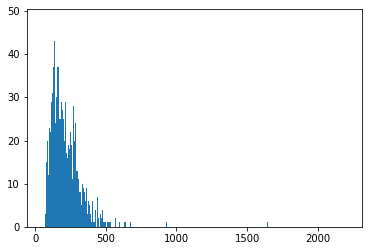

In [ ]:
plt.hist([len(x) for x in X],bins=700) #mostly the words are lessthan 500
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
#len(nos[nos>500])
len(nos[nos<500])

2090

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 500
X = pad_sequences(X,maxlen=maxlen)

In [ ]:
len(X[0])

500

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
vocab_size

27758

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, word_dim))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  return weight_matrix  

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(27758, 100)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=word_dim, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          2775800   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 2,893,693
Trainable params: 117,893
Non-trainable params: 2,775,800
_________________________________________________________________


In [ ]:
Y = pd.get_dummies(data['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2126, 5)


In [ ]:
y = data['category'].replace({'business':1,'entertainment':2,'politics':3,'sport':4,'tech':5})

In [ ]:
X.shape

(2126, 500)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1913, 500) (1913, 5)
(213, 500) (213, 5)


In [ ]:
model_2 = Sequential()
model_2.add(Embedding(50000, word_dim, input_length=X.shape[1]))
model_2.add(SpatialDropout1D(0.2))
model_2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_2.add(Dense(5, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 500, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_history = model_2.fit(X_train,Y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 67s 2s/step - loss: 1.6019 - accuracy: 0.2526 - val_loss: 1.5662 - val_accuracy: 0.2010
Epoch 2/10
24/24 [==============================] - 44s 2s/step - loss: 1.5855 - accuracy: 0.4533 - val_loss: 1.4131 - val_accuracy: 0.6319
Epoch 3/10
24/24 [==============================] - 43s 2s/step - loss: 1.0746 - accuracy: 0.7908 - val_loss: 0.8462 - val_accuracy: 0.7102
Epoch 4/10
24/24 [==============================] - 44s 2s/step - loss: 0.5501 - accuracy: 0.8885 - val_loss: 0.5855 - val_accuracy: 0.8068
Epoch 5/10
24/24 [==============================] - 44s 2s/step - loss: 0.3151 - accuracy: 0.9072 - val_loss: 0.3757 - val_accuracy: 0.8668
Epoch 6/10
24/24 [==============================] - 43s 2s/step - loss: 0.1006 - accuracy: 0.9804 - val_loss: 0.2392 - val_accuracy: 0.9347
Epoch 7/10
24/24 [==============================] - 43s 2s/step - loss: 0.0460 - accuracy: 0.9933 - val_loss: 0.2766 - val_accuracy: 0.9034
Epoch 8/10
24/24 [==

In [ ]:
pred_2 = model_2.predict(X_test)

In [ ]:
scores = model_2.evaluate(X_test, Y_test)
print(scores)

7/7 [==============================] - 1s 117ms/step - loss: 0.3012 - accuracy: 0.9484
[0.30119508504867554, 0.9483568072319031]


In [ ]:
model_history_1 = model.fit(X_train,Y_train,epochs=6,validation_split=0.3)

Epoch 1/6
42/42 [==============================] - 1s 34ms/step - loss: 0.5623 - accuracy: 0.8021 - val_loss: 0.3737 - val_accuracy: 0.8990
Epoch 2/6
42/42 [==============================] - 1s 32ms/step - loss: 0.4253 - accuracy: 0.8693 - val_loss: 0.6094 - val_accuracy: 0.8101
Epoch 3/6
42/42 [==============================] - 1s 31ms/step - loss: 0.6573 - accuracy: 0.7894 - val_loss: 0.4658 - val_accuracy: 0.8850
Epoch 4/6
42/42 [==============================] - 1s 30ms/step - loss: 0.4583 - accuracy: 0.8641 - val_loss: 0.4031 - val_accuracy: 0.8833
Epoch 5/6
42/42 [==============================] - 1s 31ms/step - loss: 0.5429 - accuracy: 0.8252 - val_loss: 0.3357 - val_accuracy: 0.8972
Epoch 6/6
42/42 [==============================] - 1s 31ms/step - loss: 0.4190 - accuracy: 0.8588 - val_loss: 0.4091 - val_accuracy: 0.8624


In [ ]:
scores_of_model = model.evaluate(X_test, Y_test)
print(scores_of_model)

7/7 [==============================] - 0s 20ms/step - loss: 0.2832 - accuracy: 0.9249
[0.2832286059856415, 0.9248826503753662]


In [ ]:
pred_1 = np.argmax(model.predict(X_test),axis=1)